In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

In [2]:
# def step_1(
#     graph:nx.Graph
# ):
#     """ 
#     The oldest node dies and its wealth is redistributed among the other nodes.
#     """
#     # Find the oldest node
#     oldest_node = max(graph.nodes(data=True), key=lambda x: x[1]['age'])[0]
#     oldest_node_wealth = graph.nodes[oldest_node]['wealth']
#     oldest_node_neighbors = list(graph.neighbors(oldest_node))

#     # Remove the oldest node
#     graph.remove_node(oldest_node)

#     # If the oldest node has no neighbors, let its neighbours be the whole society
#     if len(oldest_node_neighbors) == 0:
#         oldest_node_neighbors = list(graph.nodes())

#     # Redistribute the wealth
#     wealth_per_neighbor = oldest_node_wealth / len(oldest_node_neighbors)
#     for neighbor in oldest_node_neighbors:
#         graph.nodes[neighbor]['wealth'] += wealth_per_neighbor

#     return oldest_node

# def step_2(
#     graph:nx.Graph,
#     new_node:int,
#     p:float=0.3,
#     q:float=0.3,
#     s:int=10
# ):
#     """
#     Add a new node and reallocate wealth.
#     """
#     # Assert that p is between 0 and 1
#     assert 0 <= p <= 1, "p must be between 0 and 1"
#     # Assert that q is non-negative
#     assert q >= 0, "q must be non-negative"
#     # Assert that s is positive
#     assert s > 0, "s must be positive"

#     # Select two random eligible nodes
#     eligible_nodes = [node for node in graph.nodes() if graph.nodes[node]['wealth'] >= q]
#     if len(eligible_nodes) < 2:
#         raise ValueError("There are not enough eligible nodes to form a connection")
#     parents = random.sample(eligible_nodes, 2)

#     # Add the new node
#     graph.add_node(new_node, age=0, wealth=0)
#     graph.add_edge(parents[0], new_node)
#     graph.add_edge(parents[1], new_node)

#     # Reallocate wealth
#     wealth_to_allocate = 2 * q
#     # all nodes except for the parents and the new node are eligible receivers
#     eligible_receivers = [node for node in graph.nodes() if node not in parents + [new_node]]
#     total_wealth = np.array([graph.nodes[node]['wealth'] for node in eligible_receivers]).sum()
#     probabilities = np.array([graph.nodes[node]['wealth'] / total_wealth for node in eligible_receivers])
#     start_time = time.time()
#     for i in range(s):
#         # Select a random receiver with a probability proportional to their wealth
#         receiver = np.random.choice(eligible_receivers, p=probabilities)
#         graph.nodes[receiver]['wealth'] += wealth_to_allocate / s
#     end_time = time.time()
#     print(f"Time taken to reallocate wealth: {(end_time - start_time)*1000} ms")

#     # Start-up capital for new node
#     graph.nodes[new_node]['wealth'] = p * (graph.nodes[parents[0]]['wealth'] + graph.nodes[parents[1]]['wealth'] - 2 * q)

#     # New wealth for parents
#     graph.nodes[parents[0]]['wealth'] = (1 - p) * (graph.nodes[parents[0]]['wealth'] - q)
#     graph.nodes[parents[1]]['wealth'] = (1 - p) * (graph.nodes[parents[1]]['wealth'] - q)

#     return parents   

# def step_3(graph:nx.Graph):
#     """
#     Increase the age of all nodes by 1.
#     """
#     for node in graph.nodes():
#         graph.nodes[node]['age'] += 1

# def simulation(
#     graph:nx.Graph,
#     steps:int=100,
#     verbose:bool=False
# ):
#     """
#     Run a simulation of the society.
#     """
#     for i in range(steps):
#         # time each step to see how long they take
#         start_time = time.time()
#         oldest_node = step_1(graph)
#         end_time = time.time()
#         if verbose:
#             print("Step 1 took: ", (end_time - start_time)*1000, "ms")
#             print(f"Step {i+1}: Oldest node {oldest_node} died")

#         start_time = time.time()
#         parents = step_2(graph, new_node=oldest_node)
#         end_time = time.time()
#         if verbose:
#             print("Step 2 took: ", (end_time - start_time)*1000, "ms")
#             print(f"Step {i+1}: New node {oldest_node} was born from parents {parents[0]} and {parents[ 1]}")
        
#         start_time = time.time()
#         step_3(graph)
#         end_time = time.time()
#         if verbose:
#             print("Step 3 took: ", (end_time - start_time)*1000, "ms")
#     return graph

In [3]:
import networkx as nx
import random
import numpy as np
import heapq
import time

class GraphWithOldestNode:
    def __init__(self, graph):
        self.graph = graph
        self.oldest_nodes_heap = []
        for node in self.graph.nodes(data=True):
            heapq.heappush(self.oldest_nodes_heap, (-node[1]['age'], node[0]))

    def step_1(self):
        """ The oldest node dies and its wealth is redistributed among the other nodes. """
        # Find the oldest node
        while self.oldest_nodes_heap:
            _, oldest_node = heapq.heappop(self.oldest_nodes_heap)
            if oldest_node in self.graph:
                break
        oldest_node_wealth = self.graph.nodes[oldest_node]['wealth']
        oldest_node_neighbors = list(self.graph.neighbors(oldest_node))

        # Remove the oldest node
        self.graph.remove_node(oldest_node)

        # If the oldest node has no neighbors, let its neighbours be the whole society
        if len(oldest_node_neighbors) == 0:
            oldest_node_neighbors = list(self.graph.nodes())

        # Redistribute the wealth
        wealth_per_neighbor = oldest_node_wealth / len(oldest_node_neighbors)
        for neighbor in oldest_node_neighbors:
            self.graph.nodes[neighbor]['wealth'] += wealth_per_neighbor

        return oldest_node

    def step_2(self, new_node:int, age_of_new_node:int, p:float=0.3, q:float=0.3, s:int=10):
        """ Add a new node and reallocate wealth. """
        assert 0 <= p <= 1, "p must be between 0 and 1"
        assert q >= 0, "q must be non-negative"
        assert s > 0, "s must be positive"

        # Select two random eligible nodes
        eligible_nodes = [node for node in self.graph.nodes() if self.graph.nodes[node]['wealth'] >= q]
        if len(eligible_nodes) < 2:
            raise ValueError("There are not enough eligible nodes to form a connection")
        parents = random.sample(eligible_nodes, 2)

        # Add the new node
        self.graph.add_node(new_node, age=0, wealth=0)
        self.graph.add_edge(parents[0], new_node)
        self.graph.add_edge(parents[1], new_node)
        heapq.heappush(self.oldest_nodes_heap, (0, new_node))

        # Reallocate wealth
        wealth_to_allocate = 2 * q
        eligible_receivers = [node for node in self.graph.nodes() if node not in parents + [new_node]]
        total_wealth = np.array([self.graph.nodes[node]['wealth'] for node in eligible_receivers]).sum()
        probabilities = np.array([self.graph.nodes[node]['wealth'] / total_wealth for node in eligible_receivers])
        
        start_time = time.time()
        receivers = np.random.choice(eligible_receivers, size=s, p=probabilities)
        for receiver in receivers:
            self.graph.nodes[receiver]['wealth'] += wealth_to_allocate / s
        end_time = time.time()
        #print(f"Time taken to reallocate wealth: {(end_time - start_time) * 1000} ms")

        # Start-up capital for new node
        self.graph.nodes[new_node]['wealth'] = p * (self.graph.nodes[parents[0]]['wealth'] + self.graph.nodes[parents[1]]['wealth'] - 2 * q)

        # New wealth for parents
        self.graph.nodes[parents[0]]['wealth'] = (1 - p) * (self.graph.nodes[parents[0]]['wealth'] - q)
        self.graph.nodes[parents[1]]['wealth'] = (1 - p) * (self.graph.nodes[parents[1]]['wealth'] - q)

        return parents

    def step_3(self):
        """ Increase the age of all nodes by 1. """
        for node in self.graph.nodes(data=True):
            node[1]['age'] += 1
            heapq.heappush(self.oldest_nodes_heap, (-node[1]['age'], node[0]))

def simulation(graph:nx.Graph, steps:int=100, verbose:bool=False):
    graph_manager = GraphWithOldestNode(graph)
    for i in range(steps):
        if i % 1000 == 0:
            print(f"Step {i+1}")
        start_time = time.time()
        oldest_node = graph_manager.step_1()
        end_time = time.time()
        if verbose:
            print("Step 1 took: ", (end_time - start_time) * 1000, "ms")
            print(f"Step {i+1}: Oldest node {oldest_node} died")

        start_time = time.time()
        parents = graph_manager.step_2(new_node=oldest_node, age_of_new_node=-i, p=0.3, q=0.7)
        end_time = time.time()
        if verbose:
            print("Step 2 took: ", (end_time - start_time) * 1000, "ms")
            print(f"Step {i+1}: New node {oldest_node} was born from parents {parents[0]} and {parents[1]}")

        start_time = time.time()
        #graph_manager.step_3()
        end_time = time.time()
        if verbose:
            print("Step 3 took: ", (end_time - start_time) * 1000, "ms")
    return graph

In [4]:
# import numpy as np
# import random

# class GraphManager:
#     def __init__(self, graph):
#         self.graph = graph
#         self.age_heap = []
#         self.total_wealth = 0
#         for node in graph.nodes(data=True):
#             heapq.heappush(self.age_heap, (-node[1]['age'], node[0]))
#             self.total_wealth += node[1]['wealth']

#     def step_1(self):
#         """ 
#         The oldest node dies and its wealth is redistributed among the other nodes.
#         """
#         while self.age_heap:
#             _, oldest_node = heapq.heappop(self.age_heap)
#             if self.graph.has_node(oldest_node):
#                 break

#         oldest_node_wealth = self.graph.nodes[oldest_node]['wealth']
#         oldest_node_neighbors = list(self.graph.neighbors(oldest_node))

#         self.graph.remove_node(oldest_node)

#         if not oldest_node_neighbors:
#             oldest_node_neighbors = list(self.graph.nodes())

#         wealth_per_neighbor = oldest_node_wealth / len(oldest_node_neighbors)
#         for neighbor in oldest_node_neighbors:
#             self.graph.nodes[neighbor]['wealth'] += wealth_per_neighbor

#         return oldest_node

#     def alias_setup(self, probs):
#         K = len(probs)
#         q = np.zeros(K)
#         J = np.zeros(K)#, dtype=np.int)

#         smaller = []
#         larger = []

#         for kk, prob in enumerate(probs):
#             q[kk] = K * prob
#             if q[kk] < 1.0:
#                 smaller.append(kk)
#             else:
#                 larger.append(kk)

#         while smaller and larger:
#             small = smaller.pop()
#             large = larger.pop()

#             J[small] = large
#             q[large] = q[large] + q[small] - 1.0
#             if q[large] < 1.0:
#                 smaller.append(large)
#             else:
#                 larger.append(large)

#         return J, q

#     def alias_draw(self, J, q):
#         K = len(J)
#         kk = int(np.floor(np.random.rand() * K))
#         if np.random.rand() < q[kk]:
#             return kk
#         else:
#             return J[kk]

#     def step_2(self, new_node: int, p: float = 0.3, q: float = 0.3, s: int = 10):
#         assert 0 <= p <= 1, "p must be between 0 and 1"
#         assert q >= 0, "q must be non-negative"
#         assert s > 0, "s must be positive"

#         eligible_nodes = [node for node in self.graph.nodes() if self.graph.nodes[node]['wealth'] >= q]
#         if len(eligible_nodes) < 2:
#             raise ValueError("There are not enough eligible nodes to form a connection")
#         parents = random.sample(eligible_nodes, 2)

#         self.graph.add_node(new_node, age=0, wealth=0)
#         self.graph.add_edge(parents[0], new_node)
#         self.graph.add_edge(parents[1], new_node)
#         heapq.heappush(self.age_heap, (0, new_node))

#         wealth_to_allocate = 2 * q
#         eligible_receivers = [node for node in self.graph.nodes() if node not in parents + [new_node]]

#         total_wealth = sum(self.graph.nodes[node]['wealth'] for node in eligible_receivers)
#         probabilities = [self.graph.nodes[node]['wealth'] / total_wealth for node in eligible_receivers]
#         J, q = self.alias_setup(probabilities)

#         start_time = time.time()
#         for _ in range(s):
#             receiver_index = self.alias_draw(J, q)
#             receiver = eligible_receivers[receiver_index]
#             self.graph.nodes[receiver]['wealth'] += wealth_to_allocate / s
#         end_time = time.time()
#         print(f"Time taken to reallocate wealth: {(end_time - start_time) * 1000} ms")

#         self.graph.nodes[new_node]['wealth'] = p * (self.graph.nodes[parents[0]]['wealth'] + self.graph.nodes[parents[1]]['wealth'] - 2 * q)
#         self.graph.nodes[parents[0]]['wealth'] = (1 - p) * (self.graph.nodes[parents[0]]['wealth'] - q)
#         self.graph.nodes[parents[1]]['wealth'] = (1 - p) * (self.graph.nodes[parents[1]]['wealth'] - q)

#         return parents

#     def step_3(self):
#         for node in self.graph.nodes(data=True):
#             node[1]['age'] += 1
#             heapq.heappush(self.age_heap, (-node[1]['age'], node[0]))

# def simulation(graph: nx.Graph, steps: int = 100, verbose: bool = False):
#     manager = GraphManager(graph)
#     for i in range(steps):
#         start_time = time.time()
#         oldest_node = manager.step_1()
#         end_time = time.time()
#         if verbose:
#             print("Step 1 took: ", (end_time - start_time) * 1000, "ms")
#             print(f"Step {i+1}: Oldest node {oldest_node} died")

#         start_time = time.time()
#         parents = manager.step_2(new_node=oldest_node)
#         end_time = time.time()
#         if verbose:
#             print("Step 2 took: ", (end_time - start_time) * 1000, "ms")
#             print(f"Step {i+1}: New node {oldest_node} was born from parents {parents[0]} and {parents[1]}")

#         start_time = time.time()
#         manager.step_3()
#         end_time = time.time()
#         if verbose:
#             print("Step 3 took: ", (end_time - start_time) * 1000, "ms")
#     return graph

In [5]:
# Find a starting tree
population = int(1e4)
seed = 42
society_graph = nx.random_tree(n=population, seed=seed)

# Assign initial ages to the nodes
ages = list(range(1, population + 1))
random.shuffle(ages)
initial_ages = {node: ages[node] for node in society_graph.nodes()}
nx.set_node_attributes(society_graph, initial_ages, 'age')

# Assign initial wealth to the nodes
total_wealth = population
initial_wealth = []
for i in range(population):
    initial_wealth.append(np.random.uniform(0, 1))
initial_wealth = {node: initial_wealth[node] for node in society_graph.nodes()}
nx.set_node_attributes(society_graph, initial_wealth, 'wealth')

In [6]:
simulation(society_graph, steps=20*population, verbose=False)

Step 1
Step 1001
Step 2001
Step 3001
Step 4001
Step 5001
Step 6001
Step 7001
Step 8001
Step 9001
Step 10001
Step 11001
Step 12001
Step 13001
Step 14001
Step 15001
Step 16001
Step 17001
Step 18001
Step 19001
Step 20001
Step 21001
Step 22001
Step 23001
Step 24001
Step 25001
Step 26001
Step 27001
Step 28001
Step 29001
Step 30001
Step 31001
Step 32001
Step 33001
Step 34001
Step 35001
Step 36001
Step 37001
Step 38001
Step 39001
Step 40001
Step 41001
Step 42001
Step 43001
Step 44001
Step 45001
Step 46001
Step 47001
Step 48001
Step 49001
Step 50001
Step 51001
Step 52001
Step 53001
Step 54001
Step 55001
Step 56001
Step 57001
Step 58001
Step 59001
Step 60001
Step 61001
Step 62001
Step 63001
Step 64001
Step 65001
Step 66001
Step 67001
Step 68001
Step 69001
Step 70001
Step 71001
Step 72001
Step 73001
Step 74001
Step 75001
Step 76001
Step 77001
Step 78001
Step 79001
Step 80001
Step 81001
Step 82001
Step 83001
Step 84001
Step 85001
Step 86001
Step 87001
Step 88001
Step 89001
Step 90001
Step 91001
S

In [7]:
# get list of all wealths
post_wealths = []
for node in society_graph.nodes():
    post_wealths.append(society_graph.nodes[node]['wealth'])

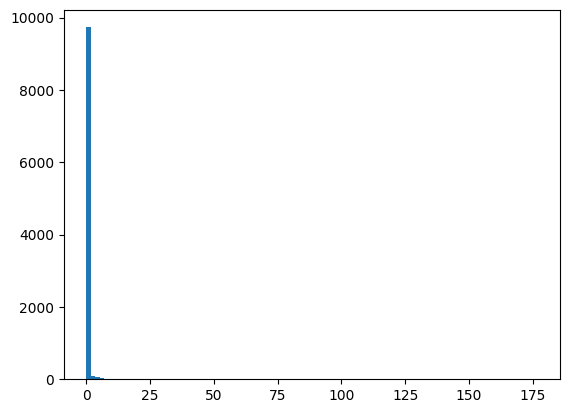

In [8]:
# plot a histogram of the wealths
plt.hist(post_wealths, bins=100)
plt.show()

In [9]:
log_post_wealths = np.log(post_wealths)

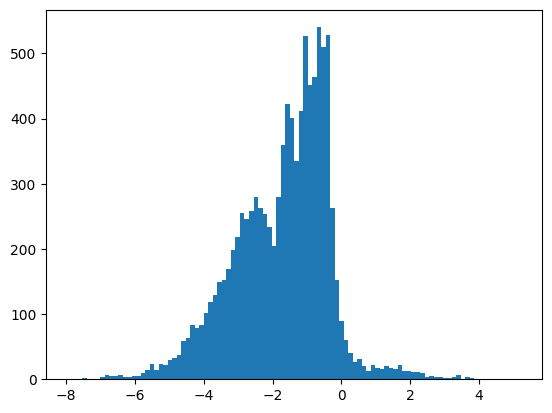

In [10]:
# plot log post wealth
plt.hist(log_post_wealths, bins=100)
plt.show()

In [11]:
# find some quantiles for bottom 50%, 80%, 90%, 99%
